調整：

*   常用字數量降低
*   資料長度增加
*   dropout提高
*   以plot呈現training data & validation accuracy

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

讀入數據&整理

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=8500) #常用字數量
x_train = sequence.pad_sequences(x_train, maxlen=150) #資料長度
x_test = sequence.pad_sequences(x_test, maxlen=150)

17465344/17464789 [==============================] - 0s 0us/step


打造一個函數學習機

In [0]:
model = Sequential()
model.add(Embedding(10000, 256)) #輸入的時候是10000輸出是256
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4)) #dropout是避免背答案
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,757,249
Trainable params: 2,757,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 480s 614ms/step - loss: 0.4336 - accuracy: 0.8004 - val_loss: 0.3759 - val_accuracy: 0.8353
Epoch 2/10
782/782 [==============================] - 476s 609ms/step - loss: 0.2834 - accuracy: 0.8879 - val_loss: 0.3483 - val_accuracy: 0.8642
Epoch 3/10
782/782 [==============================] - 476s 608ms/step - loss: 0.2060 - accuracy: 0.9187 - val_loss: 0.3345 - val_accuracy: 0.8594
Epoch 4/10
782/782 [==============================] - 481s 615ms/step - loss: 0.1532 - accuracy: 0.9426 - val_loss: 0.3754 - val_accuracy: 0.8552
Epoch 5/10
782/782 [==============================] - 485s 620ms/step - loss: 0.1654 - accuracy: 0.9340 - val_loss: 0.4353 - val_accuracy: 0.8393
Epoch 6/10
782/782 [==============================] - 479s 612ms/step - loss: 0.1211 - accuracy: 0.9558 - val_loss: 0.4732 - val_accuracy: 0.8600
Epoch 7/10
782/782 [==============================] - 476s 609ms/step - loss: 0.0735 - accuracy: 0.9756 - val_loss: 0.5516 -

plot the result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

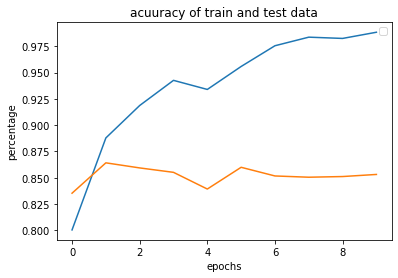

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('acuuracy of train and test data')
plt.xlabel('epochs')
plt.ylabel('percentage')
plt.legend('train', 'validation')
plt.show()